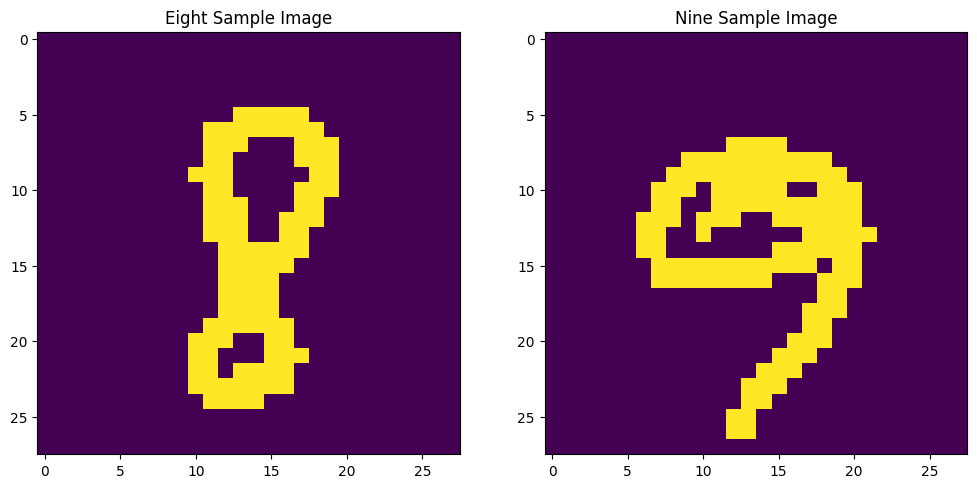

In [40]:
#part1_2_3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display

def to_binary(val):
    if(val <= 127):
        return 0
    else:
        return 1

df = pd.read_csv('./digits.csv')
df = df.apply(lambda col: col.map(to_binary) if col.name != 'label' else col)
two_rows_copy = df.tail(2).copy()
df.drop(df.tail(2).index, inplace=True)
eight = df.iloc[79].to_numpy()
nine = df.iloc[183].to_numpy()
eight = eight[1:].reshape(28,28)
nine = nine[1:].reshape(28,28)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(eight)
plt.title("Eight Sample Image")
plt.subplot(122)
plt.imshow(nine)
plt.title("Nine Sample Image")
plt.show()

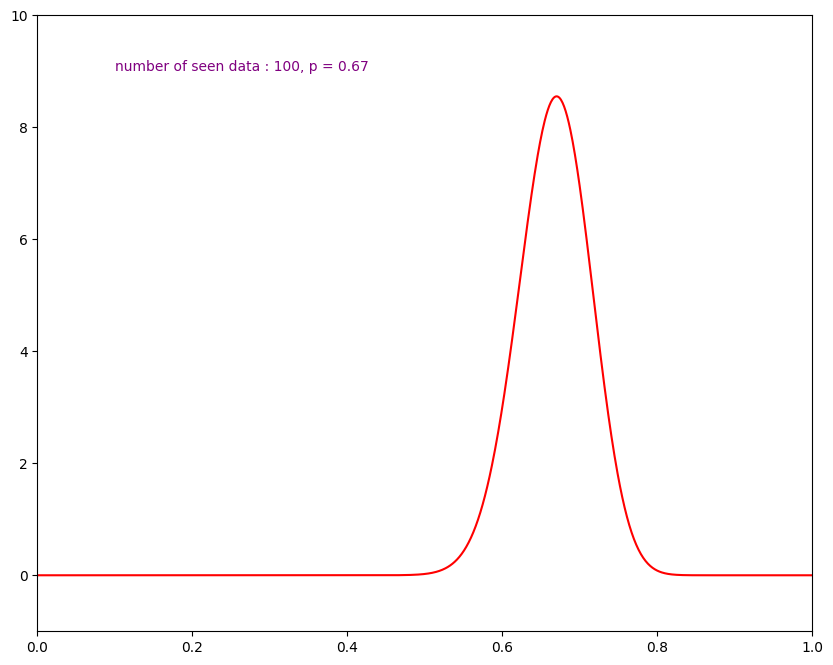

<Figure size 1000x800 with 0 Axes>

In [41]:
#part_4
t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)
    pny = stats.bernoulli.pmf(n , p)
    integral = np.sum(fy * pny) / t
    post = (fy * pny) / integral
    return post


plt.figure(figsize=(10,8))
for i in range(100):
    n =  df[df['label'] == 8].iloc[i, df.columns.get_loc('pixel404')]
    fy = update(fy, n)

    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)

In [42]:
#part_5
eights_rows = df.iloc[:100]
nines_rows = df.iloc[100:]
eight_means = np.zeros(784)
nine_means = np.zeros(784)
for i in range(784):
    eight_means[i] = eights_rows[f"pixel{i}"].mean()
    nine_means[i] = nines_rows[f"pixel{i}"].mean()
print(f"eight means array: {eight_means}")
print(f"nine means array: {nine_means}")


eight means array: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.01 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.02 0.03 0.03 0.05
 0.09 0.16 0.15 0.15 0.15 0.11 0.06 0.03 0.03 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.01 0.02 0.05 0.06 0.12 0.22 0.4
 0.51 0.56 0.58 0.53 0.51 0.41 0.21 0.13 0.07 0.02 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.01 0.01 0.03 0.06 0.11 0.2  0.29 0.5  0.63
 0.75 0.78 0.77 0.77 0.63 0.55 0.42 0.29 0.16 0.1  0.   0.01 0.01 0.
 0.   0.  